Imports

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import misc

Reading in the Data
==

In [3]:
# I've chosen to keep the old index for now.
data = pd.read_csv("data_after_part2.csv", parse_dates = [1], index_col=0)

for field in data.columns[1:]:
    data[field] = data[field].astype("category")

data.head(3)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-08-25,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Unknown,No,Unknown
1,2020-12-15,Laboratory-confirmed case,Female,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
2,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Unknown,No,Unknown


Individual Relationships
==

This is the main tool used to explore relationships in this document.

It splits up the records by the values of the "x_field", and for each group, it draws a column. That column is split into colors based on the value of "y_field" in the group. 

The proportion, for "y_field", is taken instead of the count, so that categories with small populations (but possibly significant effects, like ICU, or medcond), can be explored.

In [97]:
def plot_stacked_proportions(x_field, y_field, ax = ax):
    
    stacks = data.value_counts().groupby([x_field, y_field]).sum().unstack()

    stacks = stacks.T

    for column in stacks:
        stacks[column] /= stacks[column].sum()

    stacks.T.plot(kind="bar", stacked=True, ax = ax)

Choosing Features
==

There are very few features in this dataset, so I ended up comparing most of them to the target feature.

I divided them into two categories - "Signs of Danger", and "Risk Factors". 

The former looks at features that indicate that individual needed hospital attention. These indicate that the case might have been severe, and the chance of death higher. Of these features, ICU is the most prominent. If someone is intensive care, it is likely because their life is in serious danger.

The second, "Risk Factors", looks at properties of the individual which may be associated with a higher risk of death from Covid. The most prominent of these is age - it is well known that the elderly are far more vulnerable  to Covid than those who are younger.

Results: Signs of Danger
==

There are three possible explanatory  features in this section.

**ICU**<br>
This is by far the most obvious, and it does show clearest of any feature in data. Among records with ICU as "Yes", the proportion of deaths is dramatically higher.  (about 50%, as opposed to less than 5%)

**Hospitalized**<br>
As expected, the records with hospitalization contain a higher proportion of deaths than the records without. Also as expected, the effect is less dramatic than with ICU. (Though it is still important)

**Current Status**<br>
There is no evident relationship here. I admit I'm surprised - I expected to see a moderately greater proportion of deaths among confirmed cases in contrast to probable cases. 

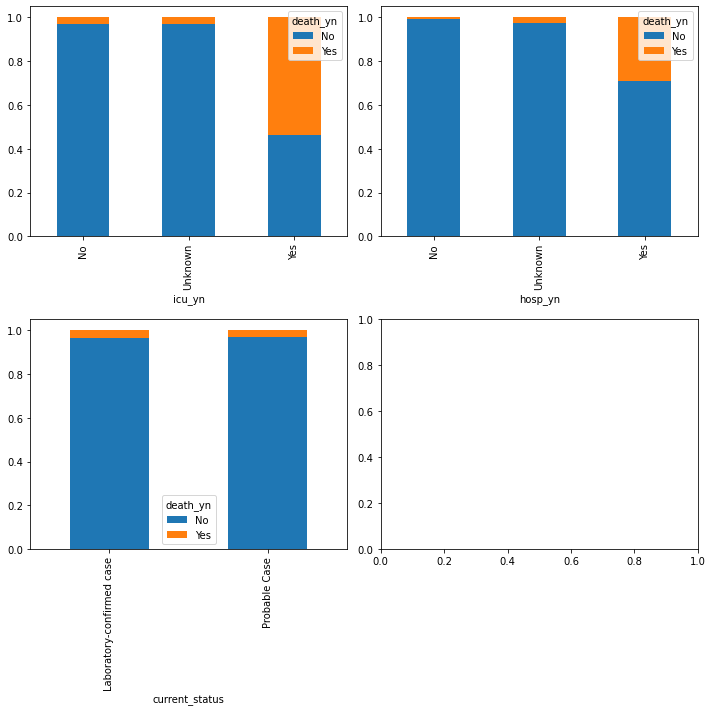

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

plot_stacked_proportions("icu_yn", "death_yn", ax[0,0])
plot_stacked_proportions("hosp_yn", "death_yn", ax[0,1])
plot_stacked_proportions("current_status", "death_yn", ax[1,0])

misc.plt_save("Danger", "relationships")

Results: Risk Factors
==

There are four possible explanatory features in this section.

**Age**<br>
This is by far the most obvious in this section, and it shows very clearly in the data. It doesn't like quite as dramatic as ICU, but nonetheless, almost the entirety of deaths is among older people. And the older the category, the higher the proportion of deaths. 

**Medical Condition**<br>
This is another well-known risk factor, and, as expected, there is a much greater number of deaths (proportionately) among those with a medical condition than those without.

**Gender**<br>
I vaguely remember reading in the newspaper that there was a risk factor associated with gender, though I forget which was at higher risk. The data here seems to indicate men are at a higher risk. The difference in absolute terms is not very large, but the proportionate difference is surprisingly  so. I doubt there are enough records in the dataset to draw anything conclusive from this, though.

**Race/Eth**<br>
I plotted these without expecting much, but there is in fact a lot going on here. The relationship between race/eth and death rate is likely very complicated, with correlations with geographical location, economic background and cultural practices coming into play as wall as any biological differences that might apply. This could well be an important feature at the Machine Learning phase. (Though not as dramatically so as age or intensive care).

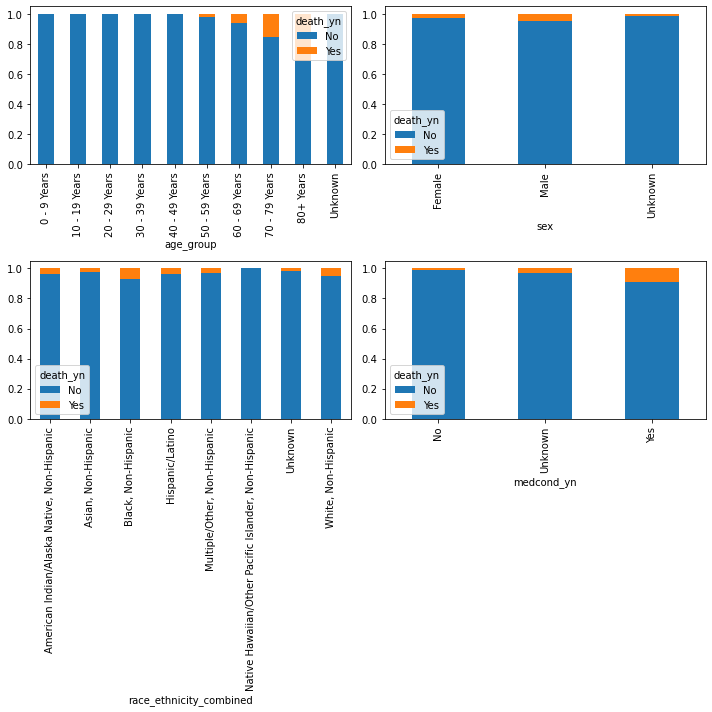

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

plot_stacked_proportions("age_group", "death_yn", ax[0,0])
plot_stacked_proportions("sex", "death_yn", ax[0,1])
plot_stacked_proportions("race_ethnicity_combined", "death_yn", ax[1,0])
plot_stacked_proportions("medcond_yn", "death_yn", ax[1,1])

misc.plt_save("Risk", "relationships")

Trivia
==

As consistency checks, I plotted some trivial relations that have little bearing on the task at hand.

**Gender vs Age**
I was brought up with the idea that women have a longer life expectancy (though I do not have a serious source for that). There is a slight difference in the data, though, with a higher proportion of women than men in the 80+ region.

**Age vs ICU**
It should come as no surprise that old age seems strongly related to the need for intensive care for covid.

**Age vs Medical Conditions**
Again, no surprises here. As age increases, the amount of people who still are confident they have no health condition decreases. And the amount of people who are confident they do increases.

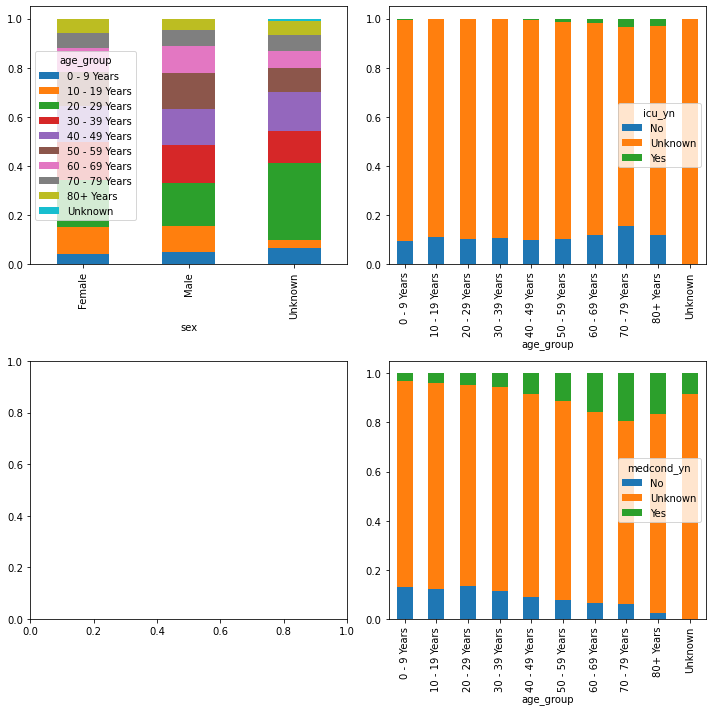

In [101]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

plot_stacked_proportions("sex", "age_group", ax[0,0])
plot_stacked_proportions("age_group", "icu_yn", ax[0,1])
plot_stacked_proportions("age_group", "medcond_yn", ax[1,1])

misc.plt_save("Trivia", "relationships")